# Centroid Model

In the following notebook, we are going to learn how to deploy a k-means clustering algorithm from the 'sklearn' library on the synthesized data

In [2]:
# Imports

# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np


In [3]:
#Generate Synthesized data using "Make_blobs" function

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


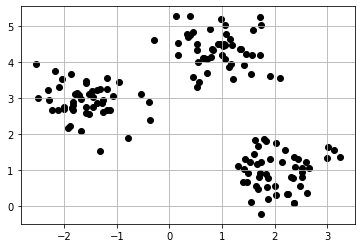

In [4]:
#Visualize the data
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()


We can see that we have 3 different clusters in our data. The ultimate goal is to identify these three clusters using "K-means" model

In [5]:
# Fit the model

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)


 To plot how the `k-means` algorithm assigned the clusters to our data we need to define a function that does exactly this:

In [8]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


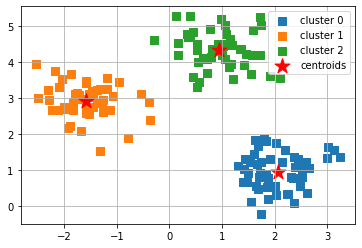

In [9]:
 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)


 We can see from the plot that `k-means` assigned clusters exactly as we expected. Cluster centroids are marked in the plot as red stars.

## Elbow Rule

 In the previous example, we set the number of clusters to three because we knew this number from the data generation process. In a real-world application, we usually don't know the number of clusters before modeling. 
 
 A great tool for deciding how many clusters to choose (and therefore to evaluate our model) is **the elbow rule** in a distortion plot. We will fit the data with various numbers of clusters and store the distortion. Distortion, in `sklearn` called **inertia**, tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.


In [10]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 


The code above fits the data with the `k-means` algorithm and try different values of `k` (from 1 to 10). Values of `k` are stored with the inertia of clusters belongings to `k`. Let's plot the inertia for each of the tested values of `k`.


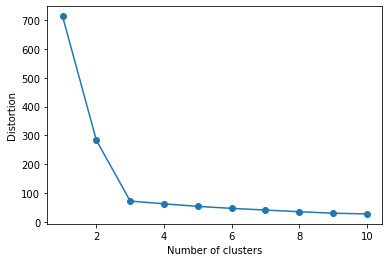

In [11]:
# elbow rule
plot_distortion(X,max_clusters=10)


 We can see in the plot that while the number of clusters increases the distortion goes down. We can also see that by reaching 3 clusters, the distortion is pretty low. If we try to add another cluster (no. 4), the distortion doesn't go down as much as before. That point in a plot is called **the elbow** and is the point we wanted to find as an optimal number of clusters. 

> #### Excersice
> Change the number of clusters and describe the difference